In [2]:
import numpy as np
import astropy.units as u
import naima
import matplotlib.pyplot as plt

In [3]:
ECPL = naima.models.ExponentialCutoffPowerLaw(
    1e36 * u.Unit("1/eV"), 1 * u.TeV, 2.1, 13 * u.TeV
)
IC = naima.models.InverseCompton(ECPL, seed_photon_fields=["CMB"])

In [4]:
IC.particle_distribution.index = 1.8
print(ECPL.index)

1.8


In [5]:
SYN = naima.models.Synchrotron(ECPL, B=100 * u.uG)
SYN.particle_distribution is IC.particle_distribution

True

In [6]:
spectrum_energy = np.logspace(-1, 14, 1000) * u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5 * u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5 * u.kpc)

In [7]:
sed_SYN

<Quantity [1.46964610e-008, 1.49213288e-008, 1.51495437e-008,
           1.53811525e-008, 1.56162026e-008, 1.58547420e-008,
           1.60968192e-008, 1.63424832e-008, 1.65917838e-008,
           1.68447711e-008, 1.71014960e-008, 1.73620099e-008,
           1.76263647e-008, 1.78946130e-008, 1.81668080e-008,
           1.84430034e-008, 1.87232535e-008, 1.90076134e-008,
           1.92961384e-008, 1.95888848e-008, 1.98859093e-008,
           2.01872692e-008, 2.04930224e-008, 2.08032276e-008,
           2.11179438e-008, 2.14372307e-008, 2.17611489e-008,
           2.20897591e-008, 2.24231230e-008, 2.27613027e-008,
           2.31043611e-008, 2.34523614e-008, 2.38053676e-008,
           2.41634444e-008, 2.45266568e-008, 2.48950706e-008,
           2.52687522e-008, 2.56477685e-008, 2.60321870e-008,
           2.64220757e-008, 2.68175035e-008, 2.72185394e-008,
           2.76252533e-008, 2.80377156e-008, 2.84559971e-008,
           2.88801694e-008, 2.93103043e-008, 2.97464745e-008,
        

In [8]:
sed_IC

<Quantity [1.78183816e-22, 1.90926446e-22, 2.04580097e-22, 2.19209879e-22,
           2.34885553e-22, 2.51681862e-22, 2.69678889e-22, 2.88962438e-22,
           3.09624440e-22, 3.31763393e-22, 3.55484830e-22, 3.80901820e-22,
           4.08135505e-22, 4.37315682e-22, 4.68581413e-22, 5.02081690e-22,
           5.37976144e-22, 5.76435803e-22, 6.17643904e-22, 6.61796768e-22,
           7.09104726e-22, 7.59793128e-22, 8.14103406e-22, 8.72294226e-22,
           9.34642713e-22, 1.00144577e-21, 1.07302149e-21, 1.14971067e-21,
           1.23187840e-21, 1.31991586e-21, 1.41424210e-21, 1.51530608e-21,
           1.62358880e-21, 1.73960556e-21, 1.86390840e-21, 1.99708875e-21,
           2.13978023e-21, 2.29266163e-21, 2.45646013e-21, 2.63195478e-21,
           2.81998017e-21, 3.02143037e-21, 3.23726322e-21, 3.46850481e-21,
           3.71625435e-21, 3.98168943e-21, 4.26607150e-21, 4.57075196e-21,
           4.89717844e-21, 5.24690174e-21, 5.62158310e-21, 6.02300213e-21,
           6.45306515e-21

In [ ]:

# # Define a PowerLaw particle distribution: dN/dE = N0 * (E / E0)^(-alpha)
# powerlaw = naima.models.PowerLaw(
#     amplitude=1e36 * u.Unit("1/eV"),  # Normalization (in 1/eV)
#     e_0=1 * u.TeV,                    # Reference energy
#     alpha=2.2                          # Spectral index
# )

# # Define Synchrotron and IC models
# B_field = 10 * u.uG  # Magnetic field strength
# syn_model = naima.models.Synchrotron(powerlaw, B=B_field)

# ic_model = naima.models.InverseCompton(
#     powerlaw, seed_photon_fields=["CMB"]  # Cosmic Microwave Background
# )

# # Define energy range for the spectrum
# spectrum_energy = np.logspace(-1, 14, 1000) * u.eV

# # Compute SEDs for both models
# sed_syn = syn_model.sed(spectrum_energy, distance=1 * u.kpc)
# sed_ic = ic_model.sed(spectrum_energy, distance=1 * u.kpc)


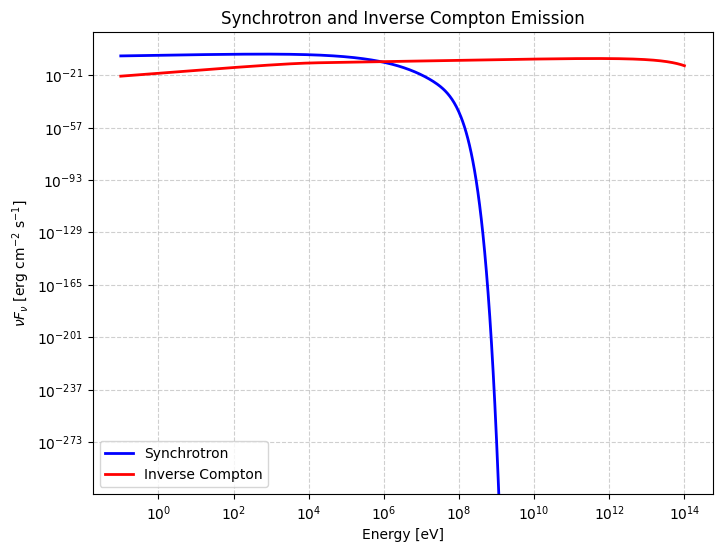

In [10]:


# Plot results
plt.figure(figsize=(8, 6))
plt.loglog(spectrum_energy, sed_SYN, label="Synchrotron", lw=2, color='b')
plt.loglog(spectrum_energy, sed_IC, label="Inverse Compton", lw=2, color='r')
plt.xlabel("Energy [eV]")
plt.ylabel(r"$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.title("Synchrotron and Inverse Compton Emission")
plt.show()
